In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Data Import

In [16]:
data = pd.read_csv("orders.csv")
data = data[data['cuisine'] == "Breakfast"]

In [6]:
group_df = data.sort_values(by=['user_id']).groupby('user_id', group_keys=False).agg(
    {'amount': ['sum'],
     'order_id': ['count'],
     'order_timestamp': ['max']
 })

group_df.columns = group_df.columns.get_level_values(0)

In [ ]:
#group_df.reset_index(inplace=True)
group_df = group_df.rename(columns={'order_id': 'frequency'})

## Data Exploration statistics

In [18]:
# statictics (df.describe)
group_df.describe()
# emerges that --> there are outliers in our dataset
q_low = group_df["amount"].quantile(0.01)
q_hi  = group_df["amount"].quantile(0.99)
#quantile outlier removal
group_df_filtered = group_df[(group_df["amount"] < q_hi) & (group_df["amount"] > q_low)]

In [19]:
# insights find top users by amount, find top users by frequency
group_df_filtered.nlargest(10, 'amount') #top 10 users by amount
group_df_filtered.nlargest(10, 'frequency') #top 10 users by frequency

,amount,frequency
user_id,,
252721201110,100.4,51
142307585091,103.4,47
297875428872,92.5,46
8898954561,80.5,45
201018354033,101.1,45
570155673276,94.8,45
640215743538,112.0,45
161000681352,104.8,44
180193317654,98.8,44


Text(0, 0.5, 'frequency')

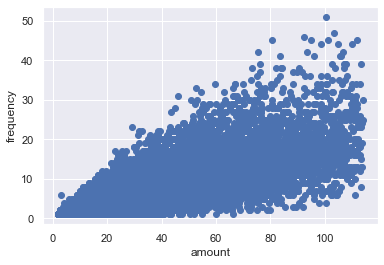

In [20]:
# relationship between amount and frequency (scatterplot)
plt.scatter(group_df_filtered['amount'],group_df_filtered['frequency'])
plt.xlabel('amount')
plt.ylabel('frequency')

## Rule-Based Customer Segmentation (Define personas)

In [ ]:
group_df_filtered['time'] = pd.to_datetime(group_df_filtered['order_timestamp'])
group_df_filtered['order_date'] = group_df_filtered['time'].dt.date
# days a customer since last seen
group_df_filtered['days_last_seen'] = dt.today().date() - (group_df_filtered['order_date'])

## Compute Customer Quartiles

In [ ]:
#quantile outlier detection
q_low = group_df["amount"].quantile(0.01)
q_hi  = group_df["amount"].quantile(0.99)
#quantile outlier removal
group_df_filtered = group_df[(group_df["amount"] < q_hi) & (group_df["amount"] > q_low)]
# bucketize customer in quartiles
group_df_filtered['amount_ex_1'] = pd.qcut(group_df_filtered['amount'], q=4)
group_df_filtered['amount_ex_1'].value_counts()
bin_labels_4 = ['Low spenders', 'Medium spenders', 'High spenders', 'Breakfast lovers']
group_df_filtered['customers_quantile'] = pd.qcut(group_df_filtered['amount'],
                              q=4,
                              labels=bin_labels_4)

## Customer Clustering With K-means

Text(0, 0.5, 'frequency')

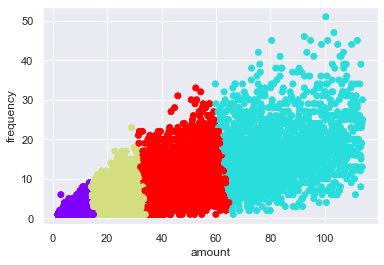

In [21]:
x= group_df_filtered.copy()


# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters
clusters['cluster_pred']=kmeans.fit_predict(x)
plt.scatter(clusters['amount'],clusters['frequency'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('amount')
plt.ylabel('frequency')


In [22]:
# standarized variables
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.73619067, -0.59624881],
       [ 2.35248983,  2.4808425 ],
       [-0.32072214, -0.59624881],
       ...,
       [-0.63779023, -0.59624881],
       [-0.56125655, -0.59624881],
       [-0.3425889 , -0.59624881]])

In [24]:
# Createa an empty list
wcss = []

In [25]:
# Create all possible cluster solutions with a loop
# We have chosen to get solutions from 1 to 9 clusters; you can ammend that if you wish
for i in range(1, 10):
    # Clsuter solution with i clusters
    kmeans = KMeans(i)
    # Fit the STANDARDIZED data
    kmeans.fit(x_scaled)
    # Append the WCSS for the iteration
    wcss.append(kmeans.inertia_)

In [26]:
# Check the result
wcss

[109396.00000000063,
 40156.03533203157,
 23641.329647745333,
 17043.47795349865,
 13782.137951767856,
 11821.736956378687,
 10202.763270237225,
 9021.409730597832,
 8063.413448997347]

Text(0, 0.5, 'WCSS')

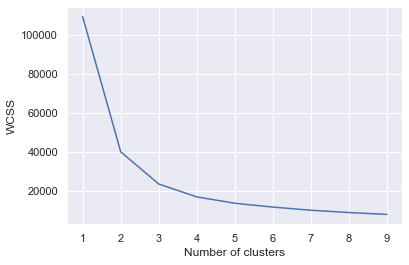

In [27]:
# Plot the number of clusters vs WCSS
plt.plot(range(1,10),wcss)
# Name your axes
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

Text(0, 0.5, 'frequency')

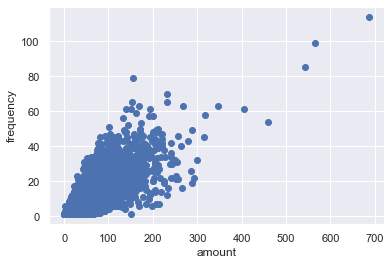

In [15]:
# We are creating a scatter plot of the two variables
plt.scatter(group_df['amount'],group_df['frequency'])
# Name your axes 
plt.xlabel('amount')
plt.ylabel('frequency')

x = group_df.copy()

#standarized variables
from sklearn import preprocessing
# Scale the inputs
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array
x_scaled = preprocessing.scale(x)
x_scaled

#Elbow method to define the optimal number of k
sse = []
k_list = range(1, 15)
for k in k_list:
    km = KMeans(n_clusters=k)
    km.fit(group_df)
    sse.append([k, km.inertia_])

tsne_results_scale = pd.DataFrame({'Cluster': range(1, 15), 'SSE': sse})
plt.figure(figsize=(12, 6))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1], marker='o')
plt.title('Optimal Number of Clusters using Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(3)
# Fit the data
kmeans.fit(x)

# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

array([[-0.62835667, -0.54970441],
       [ 1.79123312,  2.07306016],
       [-0.30288972, -0.54970441],
       ...,
       [-0.55127239, -0.54970441],
       [-0.49131795, -0.54970441],
       [-0.32001956, -0.54970441]])

Text(0, 0.5, 'Inertia')

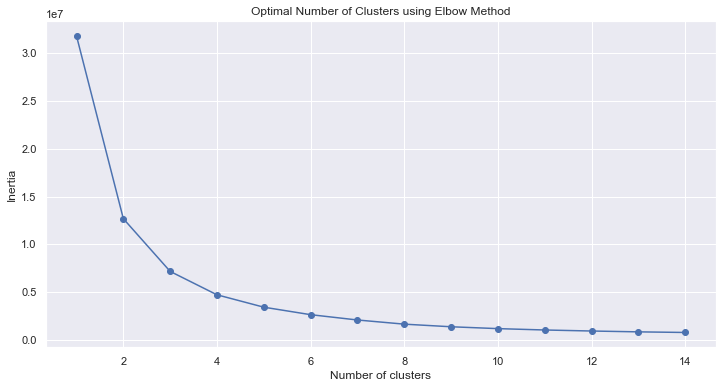

In [11]:
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(4)
# Fit the data
kmeans.fit(x)

KMeans(n_clusters=4)

In [12]:
# Create a copy of the input data
clusters = x.copy()
# Take note of the predicted clusters 
clusters['cluster_pred']=kmeans.fit_predict(x)

Text(0, 0.5, 'frequency')

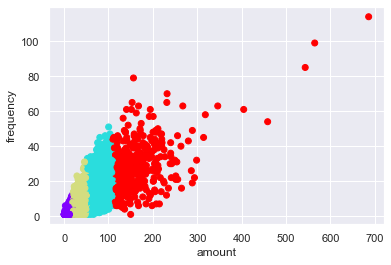

In [13]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1, indicating to plt.scatter, that there are two colors (0,1)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(clusters['amount'],clusters['frequency'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('amount')
plt.ylabel('frequency')

In [14]:
group_df.describe()

,amount,frequency
count,55834.000000,55834.000000
mean,18.972798,3.724666
std,23.351275,4.956646
min,0.500000,1.000000
25%,5.700000,1.000000
50%,10.900000,2.000000
75%,22.700000,4.000000
max,686.000000,114.000000
